<div style="background: linear-gradient(90deg, #e6f2ff 60%, #b3c6ff 100%); padding:28px; border-radius:16px; box-shadow:0 2px 8px #00004722;">
<img src='alinco.png' width="120" style="float:left; margin-right:28px; border-radius:8px; box-shadow:0 2px 8px #00004733;"/>
<div style="margin-left:150px;">
<h1 style="color:#000047; font-size:2.3em; margin-bottom:0;">Proyecto Final de Aplicación</h1>
<h2 style="color:#003366; font-size:1.3em; margin-top:0;">Clasificación de Géneros de Música</h2>
</div>
<br style="clear:both"/>
</div>

<div style="border-left:6px solid #000047; padding:18px; margin-top:18px; background:#f5f5f5; border-radius:8px;">
<span style="font-size:1.1em;"><b>Descripción:</b> Desarrolla un algoritmo de IA para clasificar automáticamente géneros musicales a partir de archivos de audio, utilizando características de dominio de frecuencia y tiempo. Se recomienda el uso del dataset <a href="https://drive.google.com/file/d/1Oy3SH2HM3QK0DSI0tF5FhzBKj7_CFVwL/view?usp=drive_link" target="_blank"><b>Music_Genre</b></a>.</span>
</div>

<div style="margin-top:18px; background:#f0f7ff; border-radius:8px; padding:14px; border:1px solid #b3c6ff;">
<b>Requerimientos:</b>
<ul style="margin-bottom:0;">
<li>Entrena una red y visualiza el progreso del <b>accuracy</b> en entrenamiento y validación.</li>
<li>Prueba distintas configuraciones de hiperparámetros para seleccionar la mejor.</li>
<li>Explica el funcionamiento y la razón de uso de la función de pérdida <b>categorical cross entropy</b>.</li>
</ul>
</div>

<div style="margin-top:18px; background:#fffbe6; border-radius:8px; padding:12px; border:1px solid #ffe066;">
<b>Condiciones de entrega:</b>
<ul>
<li>El proyecto se realiza en equipo.</li>
<li>Subir a la plataforma ALINCO un archivo <b>.zip</b> con el código, diapositivas y reporte.</li>
<li>Presentar el código y funcionamiento en una videollamada.</li>
</ul>
</div>

<div style="margin-top:18px; background:#e6ffe6; border-radius:8px; padding:12px; border:1px solid #66ff99;">
<b>Tip:</b> Documenta tu proceso, justifica tus decisiones y utiliza visualizaciones para mostrar resultados y mejoras.
</div>

Generacion de espectograma por genero (solo un archivo)

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt


Generos encontrados: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

 Genero: blues | Archivo: blues.00000.wav


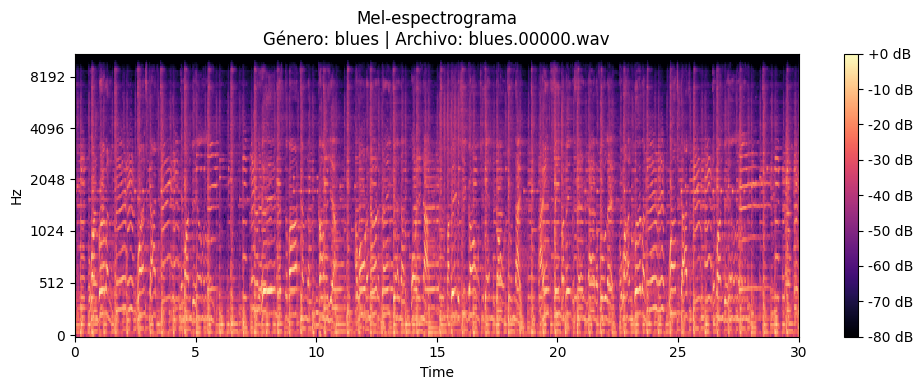


 Genero: classical | Archivo: classical.00000.wav


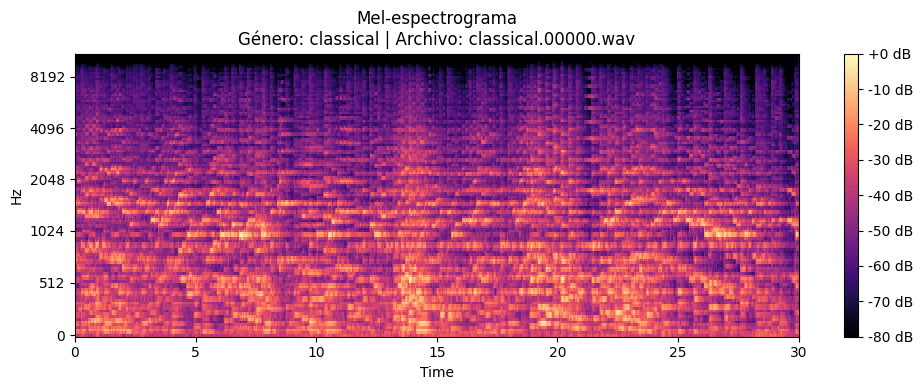


 Genero: country | Archivo: country.00000.wav


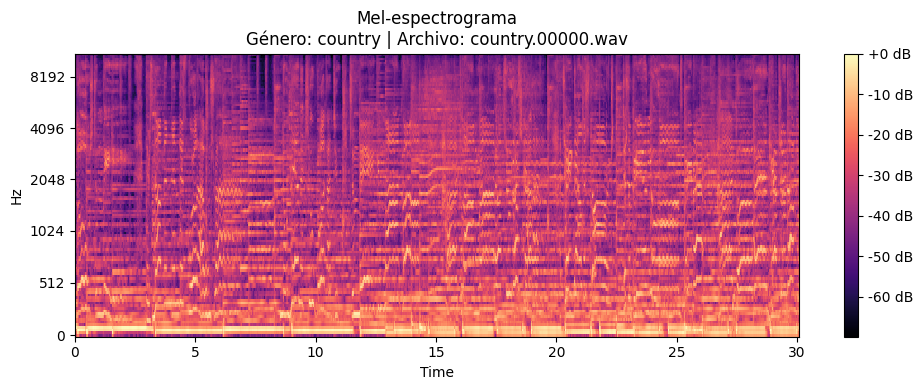


 Genero: disco | Archivo: disco.00000.wav


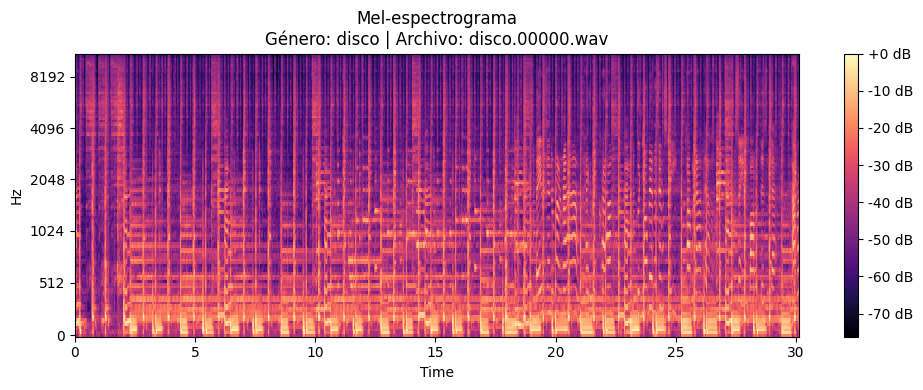


 Genero: hiphop | Archivo: hiphop.00000.wav


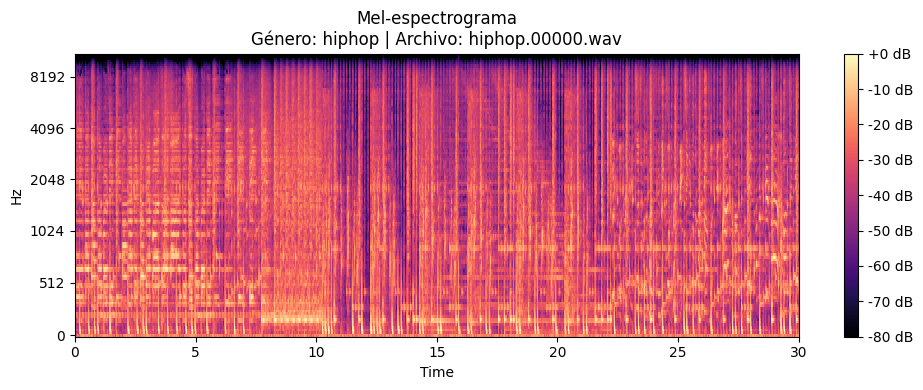


 Genero: jazz | Archivo: jazz.00000.wav


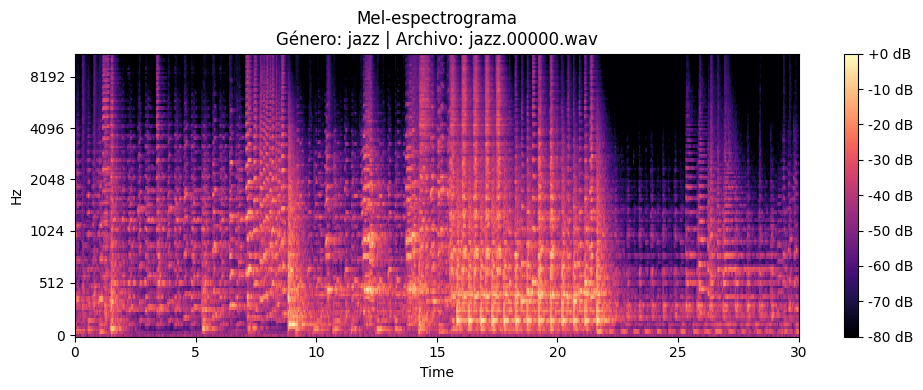


 Genero: metal | Archivo: metal.00000.wav


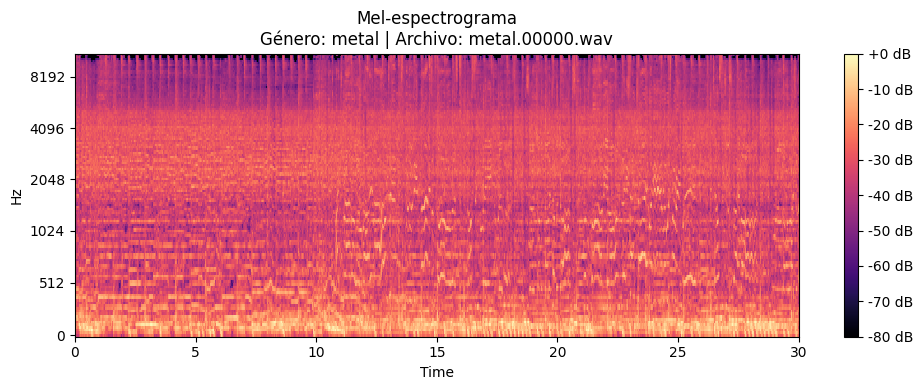


 Genero: pop | Archivo: pop.00000.wav


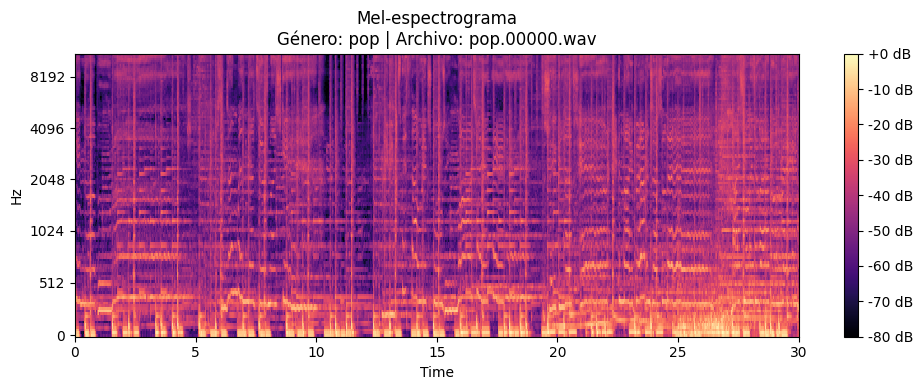


 Genero: reggae | Archivo: reggae.00000.wav


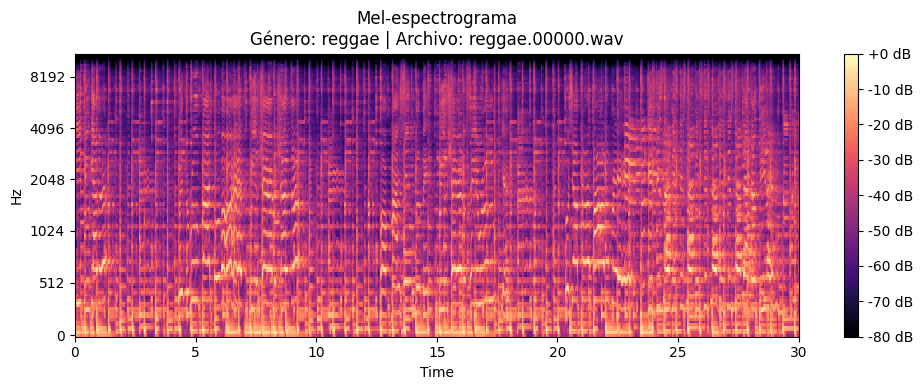


 Genero: rock | Archivo: rock.00000.wav


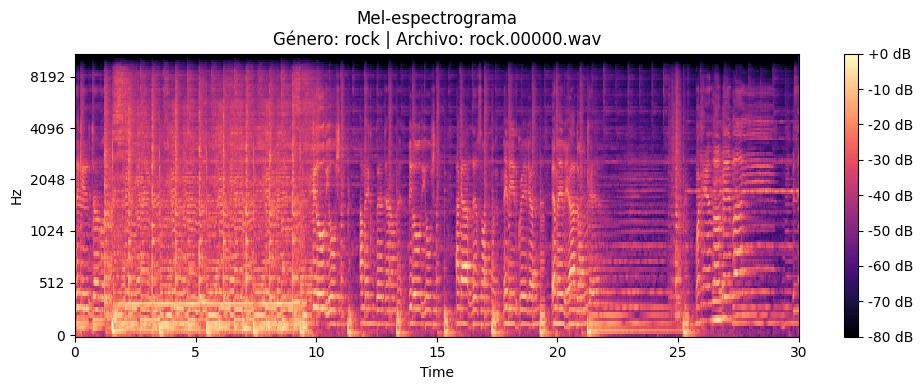

In [ ]:


BASE_DIR = "genres_original"

# Obtener la lista de géneros musicales detectando solo directorios (subcarpetas)
genres = [
    g for g in os.listdir(BASE_DIR)
    if os.path.isdir(os.path.join(BASE_DIR, g))  # filtra solo carpetas, ignora archivos sueltos
]

print("Generos encontrados:", genres)  

# Recorremos cada carpeta/género del dataset para extraer y graficar 1 espectrograma por género
for genre in genres:
    genre_path = os.path.join(BASE_DIR, genre)  # ruta completa de la carpeta del género
    
    # Buscar archivos .wav dentro de la carpeta del género
    wav_files = [
        f for f in os.listdir(genre_path)
        if f.lower().endswith(".wav")  # solo tomar archivos con extensión WAV 
    ]

    # Tomar el primer archivo WAV de la carpeta 
    file_name = wav_files[0]
    file_path = os.path.join(genre_path, file_name)

    print(f"\n Genero: {genre} | Archivo: {file_name}")

    # Cargar el audio WAV:
    # y  = señal de audio (amplitud en el tiempo)
    # sr = sample rate (frecuencia de muestreo, se fija en 22,050 Hz)
    y, sr = librosa.load(file_path, sr=22050)  
    # 22,050 Hz es una frecuencia estándar en audio para ML, suficiente para capturar timbre musical.
  

    # Generar el Mel-espectrograma:
    # S será un tensor de (128 bandas Mel x n_frames de tiempo)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    # n_mels=128, 128 bandas de frecuencia en la escala perceptual Mel 

    # Convertir de potencia a decibeles (dB)
    S_db = librosa.power_to_db(S, ref=np.max)
    # ref=np.max, usa el valor maximo de potencia como referencia 
    # output = valores negativos en dB

    # Graficar el espectrograma del audio 
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="mel")
    # x_axis=time, eje X en segundos 
    # y_axis=mel, eje Y en frecuencia Mel 

    plt.colorbar(format="%+2.0f dB")  # barra de color mostrando intensidad en dB
    plt.title(f"Mel-espectrograma\nGénero: {genre} | Archivo: {file_name}")
    plt.tight_layout()  
    plt.show()



>MFCCs son coeﬁcientes para la representación del habla basados en la percepción auditiva humana. Estos surgen de la necesidad, en el área del reconocimiento de audio automático, de extraer características de las componentes de una señal de audio que sean adecuadas para la identificación de contenido relevante, así como obviar todas aquellas que posean información poco valiosa como el ruido de fondo, emociones, volumen, tono, etc. y que no aportan nada al proceso de reconocimiento, al contrario, lo empobrecen.

>Los MFCCs son una característica ampliamente usada en el reconocimiento automático del discurso o el locutor y fueron introducidos por Davis y Mermelstein en los años 80 y han sido el estado del arte desde entonces. 

>Extraccion de MFCC de los archivos de audio por genero y creacion de dataset

In [ ]:
# Directorio raíz del dataset (subcarpetas = géneros)
DATA_DIR = "genres_original"

# Parámetros de carga del audio
SR = 22050       # frecuencia de muestreo (Hz)
DURATION = 30    # segundos máximos a leer de cada archivo

# MFCC
N_MFCC = 40      # nº de coeficientes MFCC
# =========================
# Función de extracción de features
# =========================

def extract_features(file_path):
    """
    Extrae un conjunto ampliado de características para clasificación de géneros:
    - MFCC (40)              → mean + std
    - MFCC delta (40)        → mean + std
    - MFCC delta2 (40)       → mean + std
    - Spectral contrast      → mean + std
    - Chroma STFT            → mean + std
    - Spectral centroid      → mean + std
    - Spectral bandwidth     → mean + std
    - Spectral rolloff       → mean + std
    - RMS                    → mean + std
    - Zero Crossing Rate     → mean + std

    Devuelve un vector 1D con todos los features concatenados.
    """

    # ---------- Cargar audio ----------
    y, sr = librosa.load(file_path, sr=SR, duration=DURATION)

    # Si el audio está totalmente silencioso
    if y.size == 0:
        raise ValueError("Audio vacío o no pudo cargarse correctamente")

    # ---------- MFCC básicos ----------
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)  
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std  = mfcc.std(axis=1)

    # ---------- MFCC delta y delta2 ----------
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    mfcc_delta_mean = mfcc_delta.mean(axis=1)
    mfcc_delta_std  = mfcc_delta.std(axis=1)

    mfcc_delta2_mean = mfcc_delta2.mean(axis=1)
    mfcc_delta2_std  = mfcc_delta2.std(axis=1)

    # ---------- Spectral contrast ----------
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    sc_mean = spec_contrast.mean(axis=1)
    sc_std  = spec_contrast.std(axis=1)

    # ---------- Chroma STFT ----------
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1)
    chroma_std  = chroma.std(axis=1)

    # ---------- Features espectrales simples ----------
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    zcr = librosa.feature.zero_crossing_rate(y)

    # mean y std para estos 1D
    centroid_mean, centroid_std = centroid.mean(), centroid.std()
    bandwidth_mean, bandwidth_std = bandwidth.mean(), bandwidth.std()
    rolloff_mean, rolloff_std = rolloff.mean(), rolloff.std()
    rms_mean, rms_std = rms.mean(), rms.std()
    zcr_mean, zcr_std = zcr.mean(), zcr.std()

    # ---------- Concatenar todo en un solo vector ----------
    features = np.hstack([
        mfcc_mean, mfcc_std,
        mfcc_delta_mean, mfcc_delta_std,
        mfcc_delta2_mean, mfcc_delta2_std,
        sc_mean, sc_std,
        chroma_mean, chroma_std,
        [centroid_mean, centroid_std],
        [bandwidth_mean, bandwidth_std],
        [rolloff_mean, rolloff_std],
        [rms_mean, rms_std],
        [zcr_mean, zcr_std],
    ])

    return features





In [ ]:
# =========================
# Recorrido del dataset
# =========================
rows = []     # vectores de features
genres = []   # género de cada audio
files = []    # nombre de archivo

for genre in sorted(os.listdir(DATA_DIR)):
    genre_folder = os.path.join(DATA_DIR, genre)

    # Saltar si no es carpeta
    if not os.path.isdir(genre_folder):
        continue

    wavs = sorted([
        f for f in os.listdir(genre_folder)
        if f.lower().endswith(".wav")
    ])

    print(f"\n Género: {genre} ({len(wavs)} archivos WAV encontrados)")

    for fname in wavs:
        fpath = os.path.join(genre_folder, fname)
        try:
            feats = extract_features(fpath)
            rows.append(feats)
            genres.append(genre)
            files.append(fname)
            print(f"  OK: {fname} -> {len(feats)} features extraídos")
        except Exception as e:
            print(f"  Error en {fname}: {e}")
# =========================
# Construir DataFrame y CSV
# =========================

#Orden de columnas

# 1) MFCC
mfcc_mean_cols = [f"mfcc_{i+1}_mean" for i in range(N_MFCC)]
mfcc_std_cols  = [f"mfcc_{i+1}_std"  for i in range(N_MFCC)]

# 2) MFCC delta
mfcc_delta_mean_cols = [f"mfcc_delta_{i+1}_mean" for i in range(N_MFCC)]
mfcc_delta_std_cols  = [f"mfcc_delta_{i+1}_std"  for i in range(N_MFCC)]

# 3) MFCC delta2
mfcc_delta2_mean_cols = [f"mfcc_delta2_{i+1}_mean" for i in range(N_MFCC)]
mfcc_delta2_std_cols  = [f"mfcc_delta2_{i+1}_std"  for i in range(N_MFCC)]

# 4) Spectral contrast (librosa por defecto usa 7 bandas)
S = np.abs(librosa.stft(np.zeros(SR)))
n_sc = librosa.feature.spectral_contrast(S=S, sr=SR).shape[0]
sc_mean_cols = [f"spec_contrast_{i+1}_mean" for i in range(n_sc)]
sc_std_cols  = [f"spec_contrast_{i+1}_std"  for i in range(n_sc)]


# 5) Chroma (12 notas)
n_chroma = 12
chroma_mean_cols = [f"chroma_{i+1}_mean" for i in range(n_chroma)]
chroma_std_cols  = [f"chroma_{i+1}_std"  for i in range(n_chroma)]
# 6) Espectrales simples
simple_cols = [
    "centroid_mean", "centroid_std",
    "bandwidth_mean", "bandwidth_std",
    "rolloff_mean", "rolloff_std",
    "rms_mean", "rms_std",
    "zcr_mean", "zcr_std",
]

all_cols = (
    mfcc_mean_cols +
    mfcc_std_cols +
    mfcc_delta_mean_cols +
    mfcc_delta_std_cols +
    mfcc_delta2_mean_cols +
    mfcc_delta2_std_cols +
    sc_mean_cols +
    sc_std_cols +
    chroma_mean_cols +
    chroma_std_cols +
    simple_cols
)

# Crear DataFrame
df = pd.DataFrame(rows, columns=all_cols)
df["genre"] = genres
df["file"] = files

# Guardar a CSV
output_name = "audio_features_extended.csv"
df.to_csv(output_name, index=False)

print("\n CSV generado correctamente:", output_name)
print(" Total de canciones procesadas:", len(df))
print("Nº de columnas de features:", len(all_cols))

In [ ]:
from sklearn.model_selection import train_test_split # función que divide datos en sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# 1. Cargar dataset de MFCC generado previamente
df = pd.read_csv("audio_features_extended.csv")
print(df.head())
print(df.shape)
print(" Total de canciones procesadas:", len(df))

# 2. X = features MFCC
feature_cols = [c for c in df.columns if c.startswith("mfcc_")]
X = df[feature_cols].values

# 3. y = genero en texto
y_text = df["genre"].values

# 4. Codifica generos a enteros 0..9
label_enc = LabelEncoder()
y_int = label_enc.fit_transform(y_text)

# 5. Pasar a one-hot para usar categorical_crossentropy
y_cat = to_categorical(y_int)   # shape: (n_samples, n_clases)
# -------------------------------------------------------------
# División de datos en entrenamiento (80%) y prueba/test (20%)
# -------------------------------------------------------------
# train_test_split() va a separar los vectores MFCC (X) y sus etiquetas one-hot (y_cat)
# test_size=0.2  20% de los datos van a X_test / y_test 
# random_state=42 fija la semilla aleatoria para que la división sea reproducible siempre igual
# stratify=y_int asegura que el 20% tenga la MISMA proporción de cada género que el dataset original
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_int
)

# Imprimimos las dimensiones de los sets generados
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


   mfcc_1_mean  mfcc_2_mean  mfcc_3_mean  mfcc_4_mean  mfcc_5_mean  \
0  -113.619385   121.553017   -19.151056    42.345768    -6.371168   
1  -207.581512   123.997147     8.939115    35.870758     2.919971   
2   -90.776344   140.448608   -29.100559    31.687340   -13.975973   
3  -199.462006   150.094742     5.649167    26.870144     1.755441   
4  -160.291855   126.195763   -35.602501    22.151169   -32.487640   

   mfcc_6_mean  mfcc_7_mean  mfcc_8_mean  mfcc_9_mean  mfcc_10_mean  ...  \
0    18.613033   -13.692060    15.339378   -12.283617     10.973775  ...   
1    21.518787    -8.555368    23.355938   -10.101037     11.906444  ...   
2    25.741682   -13.644712    11.623112   -11.775921      9.700466  ...   
3    14.236880    -4.828873     9.297849    -0.753142      8.147393  ...   
4    10.862022   -23.357162     0.500523   -11.804770      1.203878  ...   

   bandwidth_mean  bandwidth_std  rolloff_mean  rolloff_std  rms_mean  \
0     2002.657106     292.966459   3806.418650   

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

input_dim = X_train.shape[1]
#  Esta variable guarda features de entrada (número de columnas de X_train)
num_classes = y_train.shape[1]
#  Aqui guardas el número de clases que la red debe predecir en la salida.
#     10 clases = 10 géneros musicales 
# -------------------------------------------------------------
# Construcción de la red MLP (Multi-Layer Perceptron)
# -------------------------------------------------------------
def build_mlp(input_dim, num_classes):
    model = models.Sequential()
    # Capa de entrada: 
    # No tiene neuronas entrenables, solo conecta tus 40 features con la siguiente capa densa.
    model.add(layers.Input(shape=(input_dim,)))
    # ---------------------------------------------------------
    # Capas ocultas 
    # ---------------------------------------------------------
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
    # - Dense(128): 128 neuronas totalmente conectadas a la capa anterior.
    # - activation="relu": función no-lineal que permite aprender patrones complejos del timbre del audio.
    #   (ReLU = max(0,x), hace que solo pasen valores positivos)
    model.add(layers.Dropout(0.3))
    # - Regularización: apaga 30% de neuronas aleatoriamente por batch para evitar que memorice.
    model.add(layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
    # - Otra capa densa, pero más pequeña para comprimir la información aprendida.
    # - 64 neuronas aprenden combinaciones de lo anterior 
    model.add(layers.Dropout(0.3))
    # - Apaga 30% de neuronas de la capa de 64 durante entrenamiento.
    # ---------------------------------------------------------
    # Capa de salida (clasificación multiclase)
    # ---------------------------------------------------------
    model.add(layers.Dense(num_classes, activation="softmax"))
    # - Dense(10): 10 neuronas (una por cada género musical).
    # ---------------------------------------------------------
    # Compilar el modelo
    # ---------------------------------------------------------
    model.compile(
        optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5),
        # AdamW:
        #   - Actualiza los pesos usando gradientes adaptativos
        loss="categorical_crossentropy",
        # - Función de error para multiclase one-hot.
        # - Mide la diferencia entre la probabilidad asignada a la clase correcta vs las demás
        metrics=["accuracy"]
        # - Métrica de evaluación.
    )
    return model  
# -------------------------------------------------------------
# Crear y mostrar resumen de arquitectura
# -------------------------------------------------------------
model = build_mlp(input_dim, num_classes)

model.summary()
#  Muestra en consola:
#    - nombre y tamaño de cada capa
#    - shapes de salida por capa
#    - cuáles tienen parámetros
#    - cuántos parámetros totales se entrenarán


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        30,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,754 (155.29 KB)

 Trainable params: 39,754 (155.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1534 - loss: 11.2317 - val_accuracy: 0.2875 - val_loss: 2.2733
Epoch 2/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2034 - loss: 3.5160 - val_accuracy: 0.3313 - val_loss: 1.9704
Epoch 3/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2567 - loss: 2.4221 - val_accuracy: 0.2937 - val_loss: 1.9038
Epoch 4/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2770 - loss: 2.1915 - val_accuracy: 0.3438 - val_loss: 1.8841
Epoch 5/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: 2.0500 - val_accuracy: 0.3125 - val_loss: 1.8338
Epoch 6/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3349 - loss: 1.9056 - val_accuracy: 0.3812 - val_loss: 1.7473
Epoch 7/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3646 - loss: 1.8297 - val_accuracy: 0.4187 - val_loss: 1.6497
Epoch 8/90
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3803 - loss: 1.7869 - val_accuracy: 0.4500 - val_loss

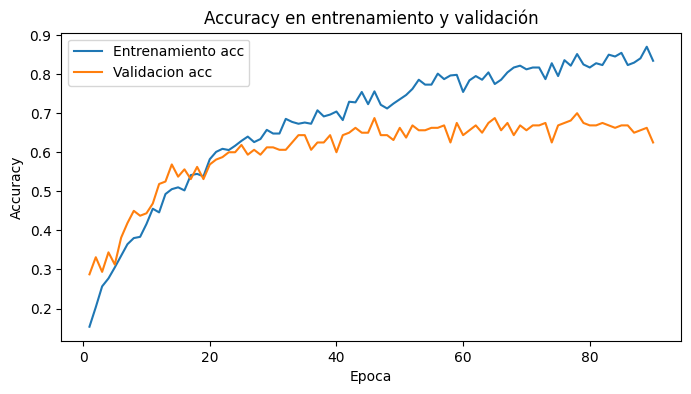

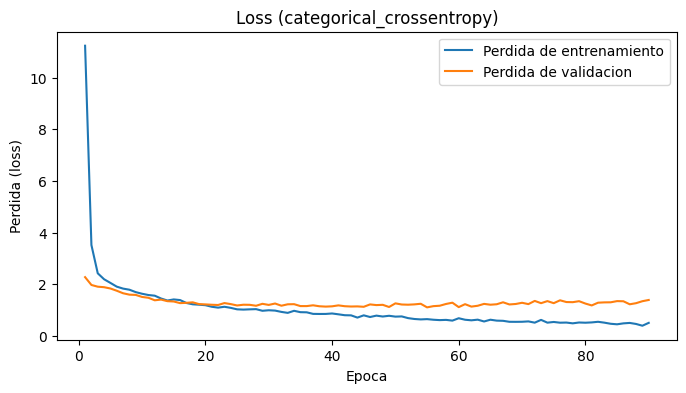

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(
    X_train, y_train,
    epochs=90,          
    batch_size=16, #la red procesa 16 canciones por lote antes de actualizar pesos.
    validation_split=0.2,  
    verbose=1
)
model.evaluate(X_test, y_test, verbose=2)
print("\n Evaluación final en set de prueba (test):",model.evaluate(X_test, y_test, verbose=2))
# Graficar accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8,4))
plt.plot(epochs, acc, label="Entrenamiento acc")
plt.plot(epochs, val_acc, label="Validacion acc")
plt.xlabel("Epoca")
plt.ylabel("Accuracy")
plt.title("Accuracy en entrenamiento y validación")
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
plt.plot(epochs, loss, label="Perdida de entrenamiento")
plt.plot(epochs, val_loss, label="Perdida de validacion")
plt.xlabel("Epoca")
plt.ylabel("Perdida (loss)")
plt.title("Loss (categorical_crossentropy)")
plt.legend()
plt.show()


In [9]:
# Evaluar sobre el 20% de test que nunca vio
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en TEST: {test_acc:.2f}")
print(f"Loss en TEST: {test_loss:.2f}")


Accuracy en TEST: 0.68
Loss en TEST: 1.46


In [ ]:
import numpy as np
import os
import pandas as pd
def extract_features_for_model(file_path):
    """
    Usa la MISMA función extract_features() que empleaste
    para generar el CSV de entrenamiento.
    No aplica escalado, solo devuelve el vector como float32.
    """
    feats_all = extract_features(file_path)   # 288 features
    feats_mfcc = feats_all[:240]             # solo MFCC, delta y delta2 (240)
    return feats_mfcc
def predict_single_audio(file_path, model, label_enc):
    """
    Carga un archivo de audio, extrae sus features con el MISMO
    esquema del entrenamiento y obtiene:
    - género predicho (texto)
    - confianza (probabilidad máxima)
    """
    # Extraer features y dar forma (1, n_features)
    x = extract_features_for_model(file_path).reshape(1, -1)

    # Predicción del modelo
    probs = model.predict(x, verbose=0)[0]   # vector de 10 probabilidades
    pred_idx = np.argmax(probs)              # índice de la clase ganadora
    pred_genre = label_enc.inverse_transform([pred_idx])[0]
    conf = float(probs[pred_idx])

    return pred_genre, conf

def test_one_song_per_genre(base_dir, model, label_enc):
    """
    Recorre cada carpeta de género en base_dir,
    toma una canción .wav, la pasa por el modelo,
    e imprime Género real vs Género predicho.
    """
    resultados = []

    for genre in sorted(os.listdir(base_dir)):
        genre_path = os.path.join(base_dir, genre)
        if not os.path.isdir(genre_path):
            continue

        # Buscar archivos .wav en la carpeta del género
        wavs = sorted([
            f for f in os.listdir(genre_path)
            if f.lower().endswith(".wav")
        ])
        if not wavs:
            continue

        # Tomamos la primera canción de ese género
        fname = wavs[0]
        file_path = os.path.join(genre_path, fname)

        # Predecir usando la función anterior
        pred_genre, conf = predict_single_audio(file_path, model, label_enc)

        print(
            f"Género real: {genre:10s} | "
            f"Archivo: {fname:15s} | "
            f"Predicho: {pred_genre:10s} | "
            f"Confianza: {conf:.2f}"
        )

        resultados.append({
            "true_genre": genre,
            "file": fname,
            "pred_genre": pred_genre,
            "confidence": conf
        })

    df_results = pd.DataFrame(resultados)
    return df_results

df_test = test_one_song_per_genre("genres_original", model, label_enc)
df_test


Género real: blues      | Archivo: blues.00000.wav | Predicho: country    | Confianza: 0.77
Género real: classical  | Archivo: classical.00000.wav | Predicho: classical  | Confianza: 1.00
Género real: country    | Archivo: country.00000.wav | Predicho: country    | Confianza: 0.98
Género real: disco      | Archivo: disco.00000.wav | Predicho: disco      | Confianza: 0.80
Género real: hiphop     | Archivo: hiphop.00000.wav | Predicho: disco      | Confianza: 0.93
Género real: jazz       | Archivo: jazz.00000.wav  | Predicho: classical  | Confianza: 0.88
Género real: metal      | Archivo: metal.00000.wav | Predicho: metal      | Confianza: 1.00
Género real: pop        | Archivo: pop.00000.wav   | Predicho: pop        | Confianza: 1.00
Género real: reggae     | Archivo: reggae.00000.wav | Predicho: reggae     | Confianza: 0.73
Género real: rock       | Archivo: rock.00000.wav  | Predicho: rock       | Confianza: 0.84


,true_genre,file,pred_genre,confidence
0,blues,blues.00000.wav,country,0.767300
1,classical,classical.00000.wav,classical,0.999403
2,country,country.00000.wav,country,0.977981
3,disco,disco.00000.wav,disco,0.795503
4,hiphop,hiphop.00000.wav,disco,0.932450
5,jazz,jazz.00000.wav,classical,0.877466
6,metal,metal.00000.wav,metal,0.997129
7,pop,pop.00000.wav,pop,1.000000
8,reggae,reggae.00000.wav,reggae,0.726474
9,rock,rock.00000.wav,rock,0.840308
